### Combined Data Exploration

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('combined_cleaned.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,low_fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.50,low_fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.20,regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store
4,NCD19,8.93,low_fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [3]:
data_info = {
    "Shape": data.shape,
    "Columns": data.columns.tolist(),
    "Missing Values": data.isnull().sum(),
    "Data Types": data.dtypes,
    "Summary Statistics": data.describe(include='all')
}
data_info

{'Shape': (14204, 11),
 'Columns': ['Item_Identifier',
  'Item_Weight',
  'Item_Fat_Content',
  'Item_Visibility',
  'Item_Type',
  'Item_MRP',
  'Outlet_Identifier',
  'Outlet_Establishment_Year',
  'Outlet_Size',
  'Outlet_Location_Type',
  'Outlet_Type'],
 'Missing Values': Item_Identifier              0
 Item_Weight                  0
 Item_Fat_Content             0
 Item_Visibility              0
 Item_Type                    0
 Item_MRP                     0
 Outlet_Identifier            0
 Outlet_Establishment_Year    0
 Outlet_Size                  0
 Outlet_Location_Type         0
 Outlet_Type                  0
 dtype: int64,
 'Data Types': Item_Identifier               object
 Item_Weight                  float64
 Item_Fat_Content              object
 Item_Visibility              float64
 Item_Type                     object
 Item_MRP                     float64
 Outlet_Identifier             object
 Outlet_Establishment_Year      int64
 Outlet_Size                   object


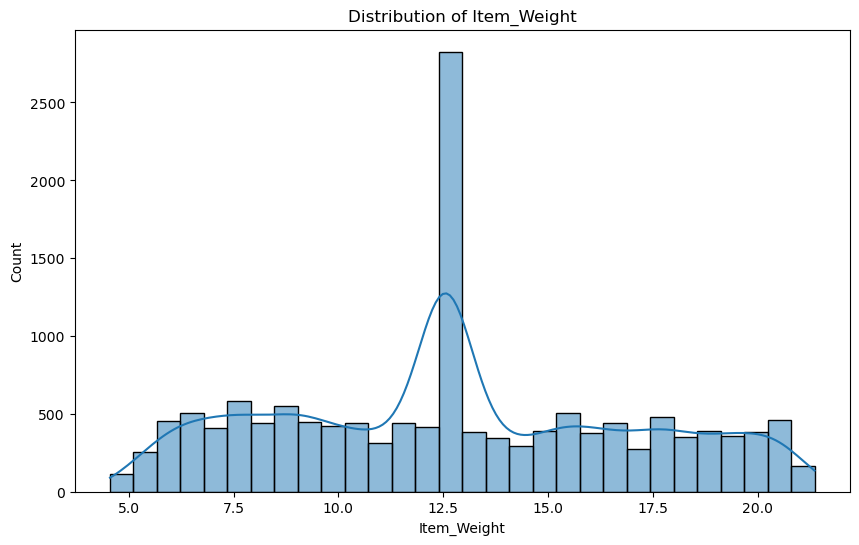

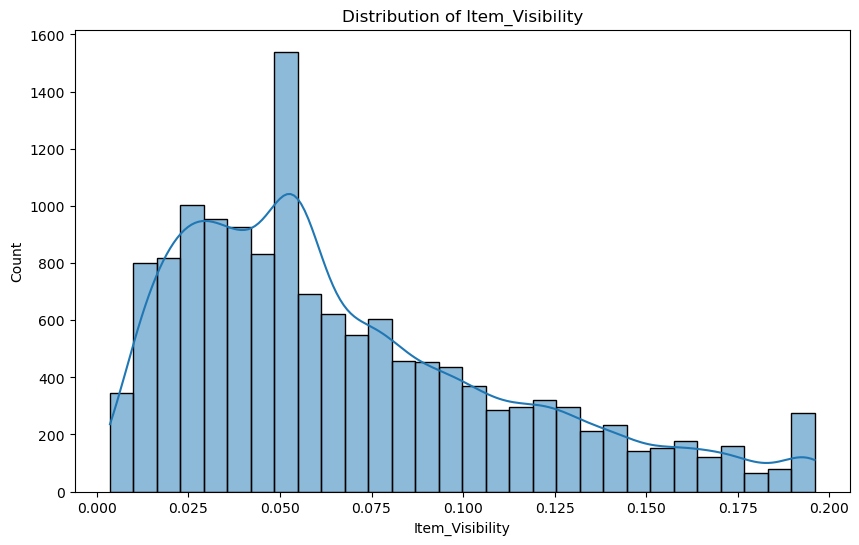

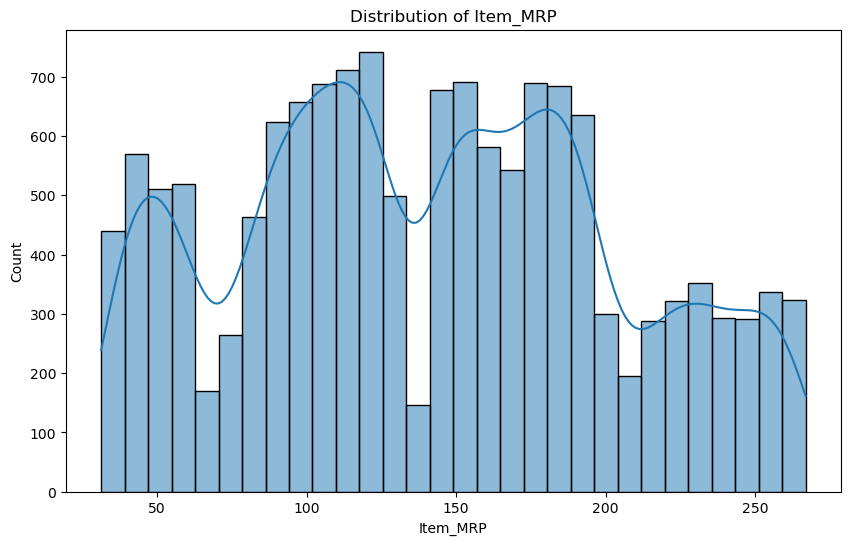

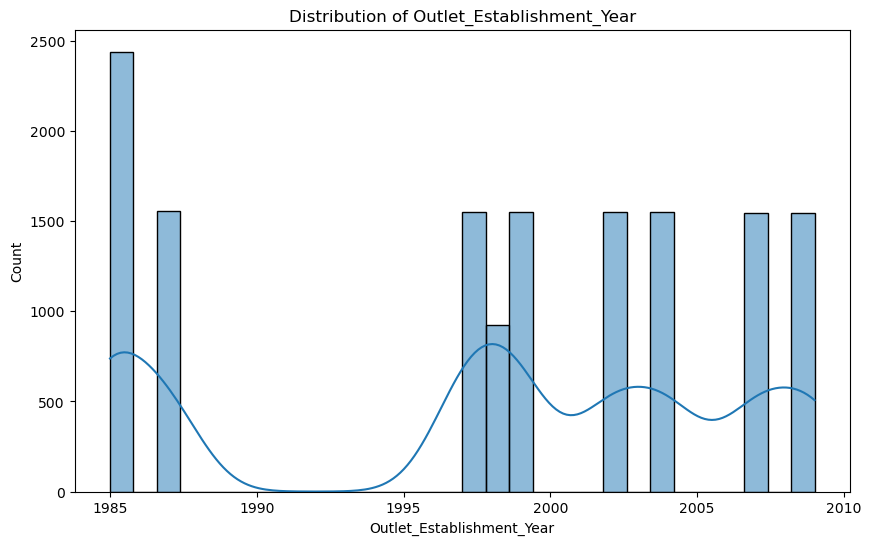

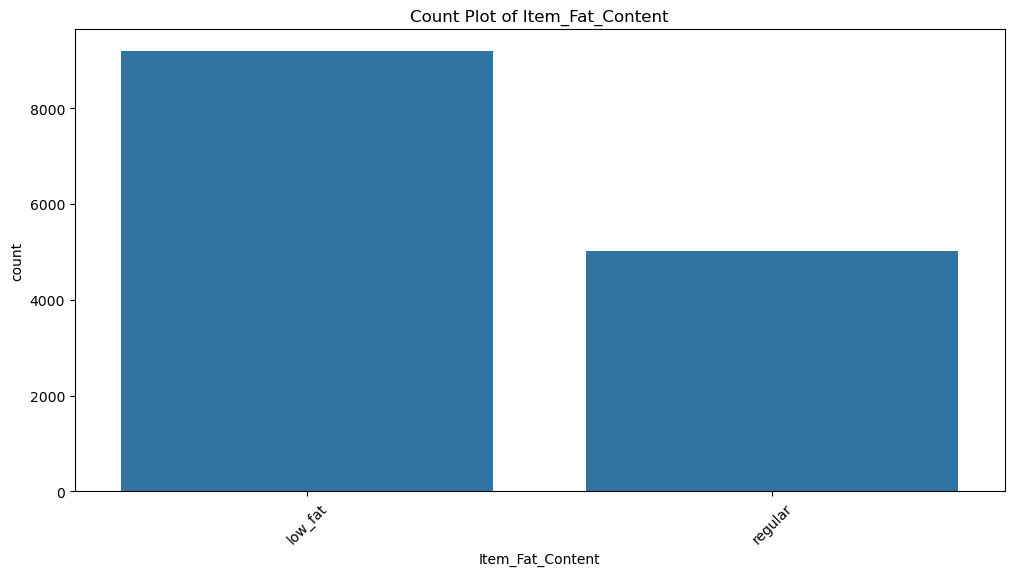

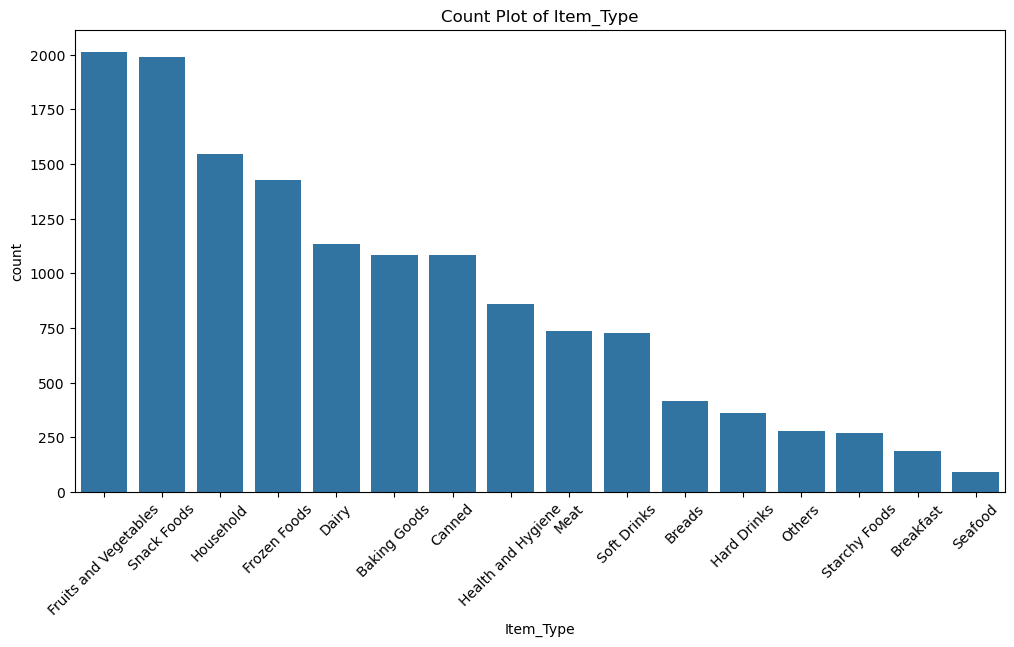

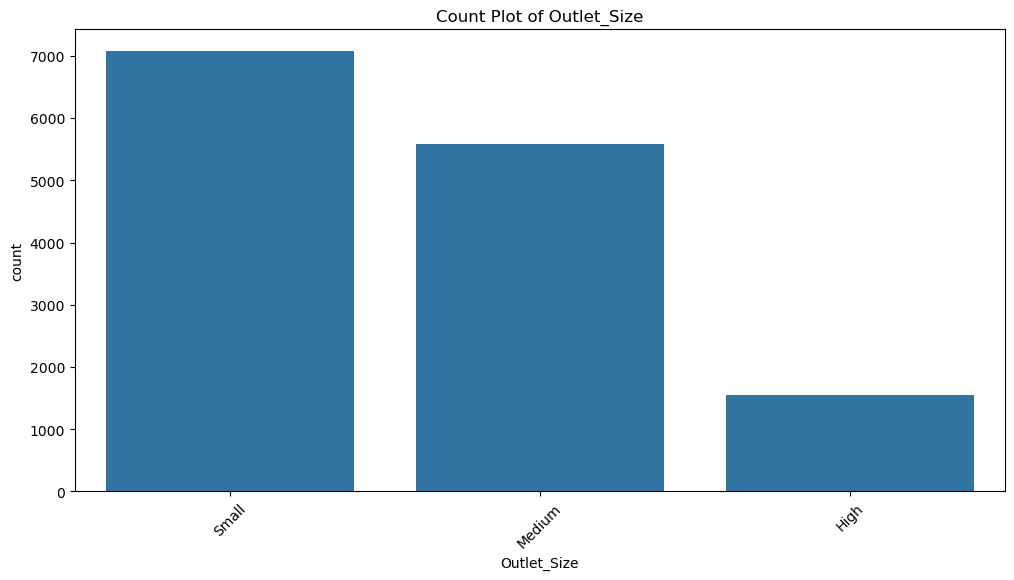

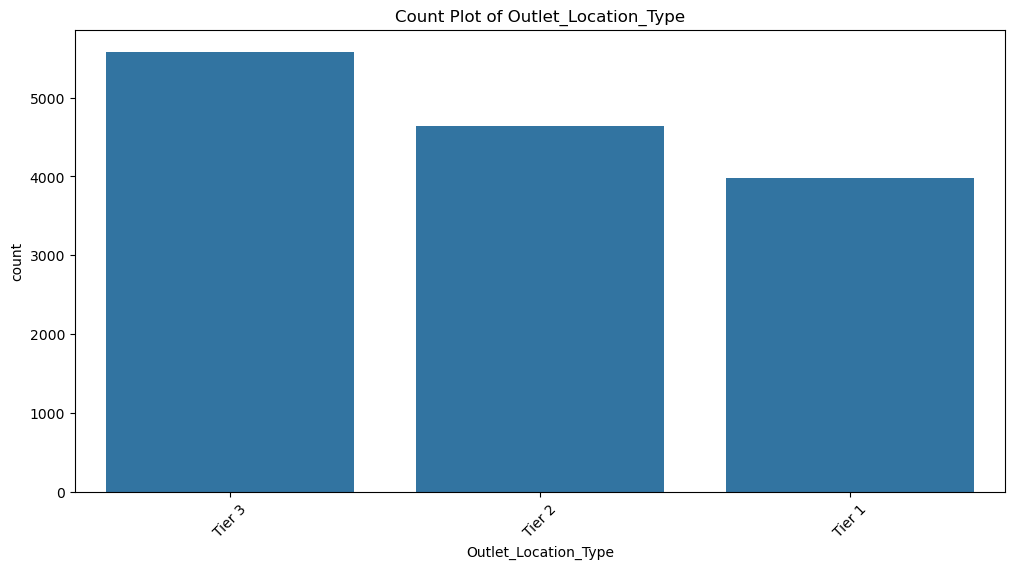

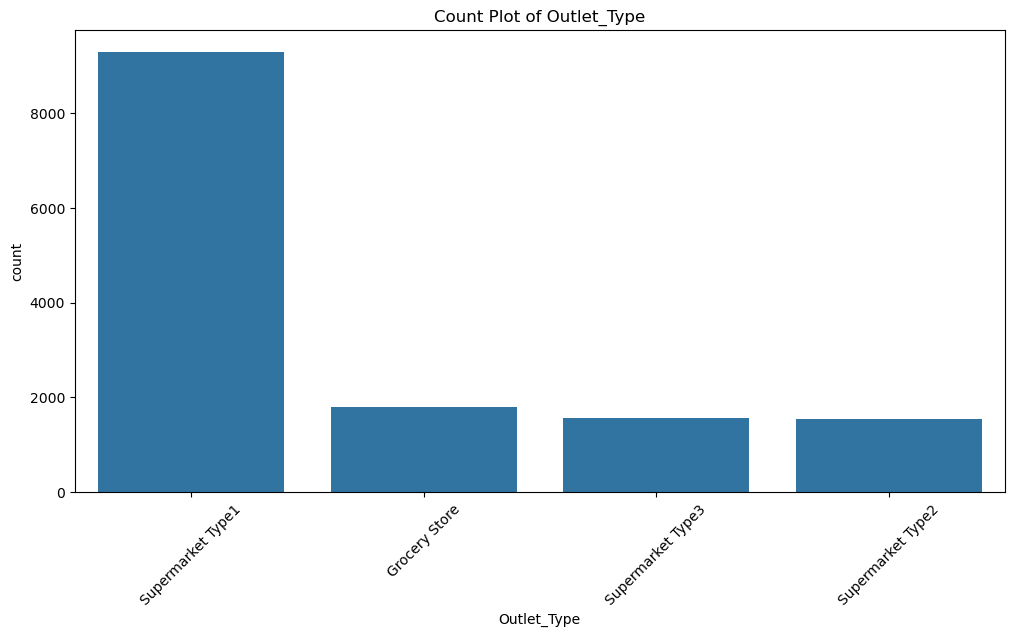

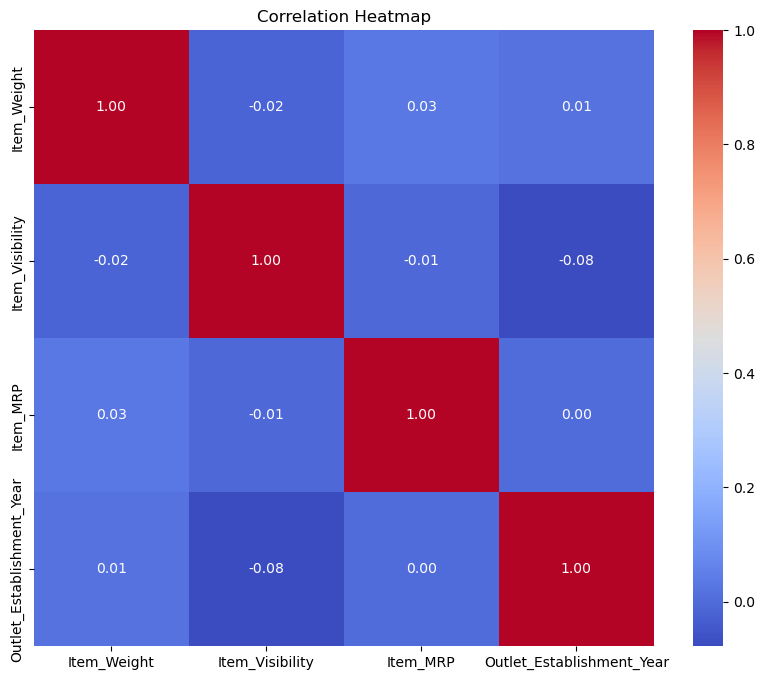

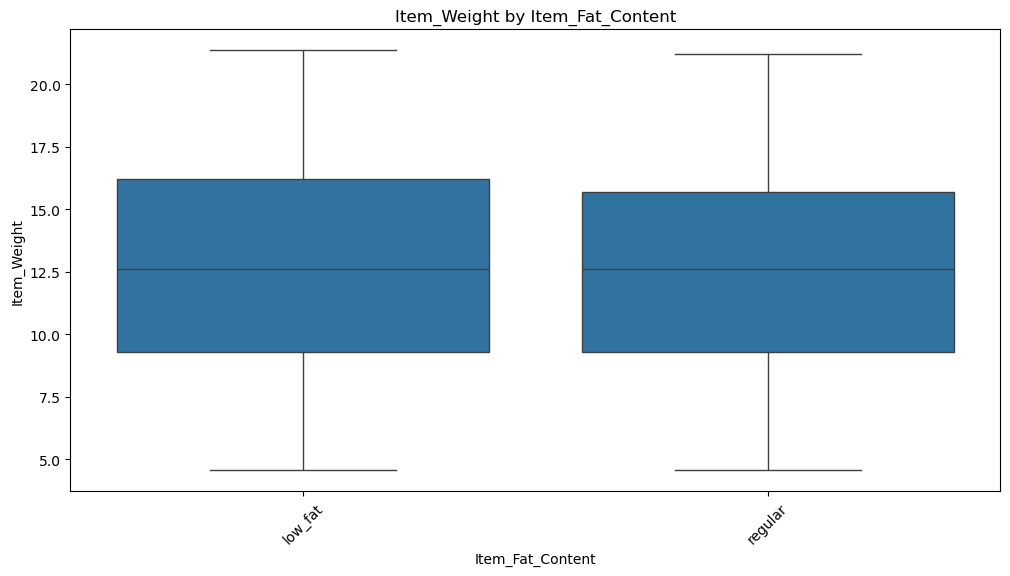

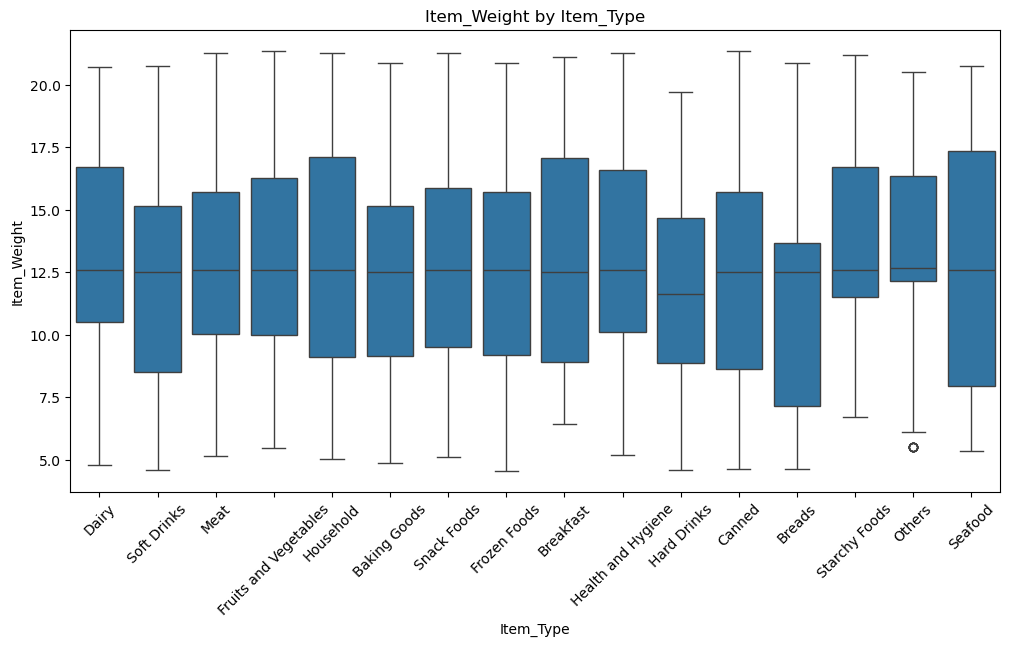

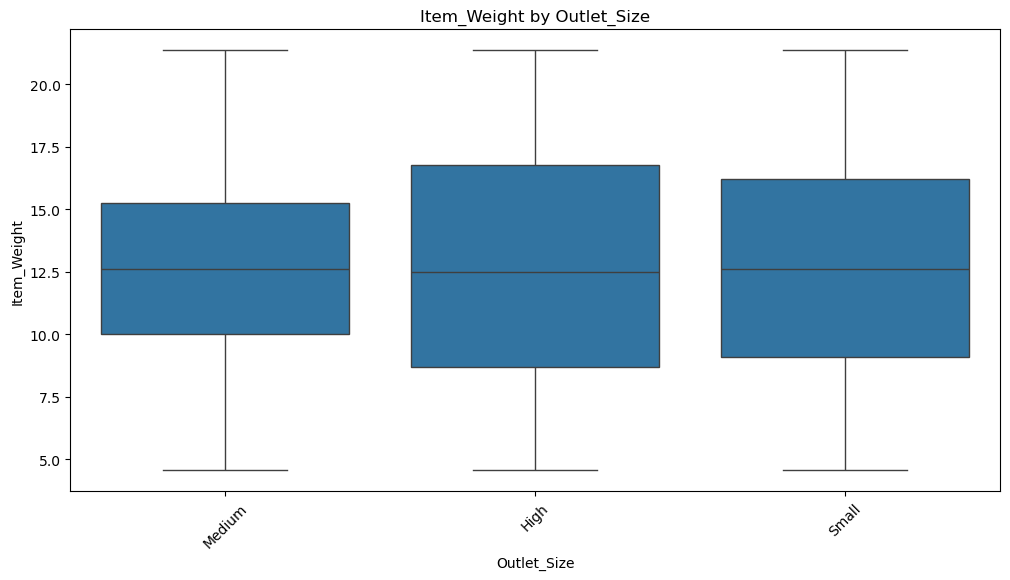

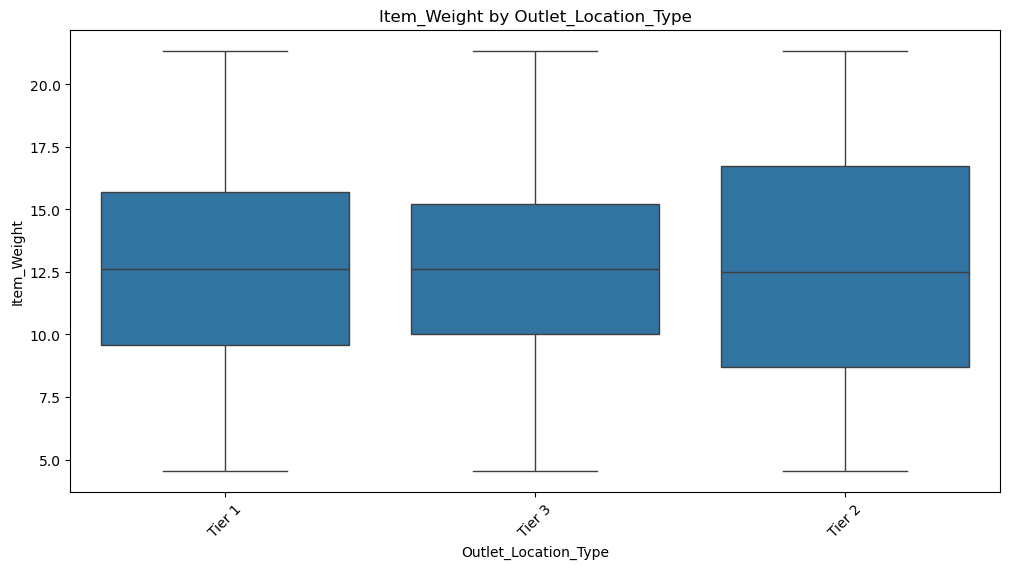

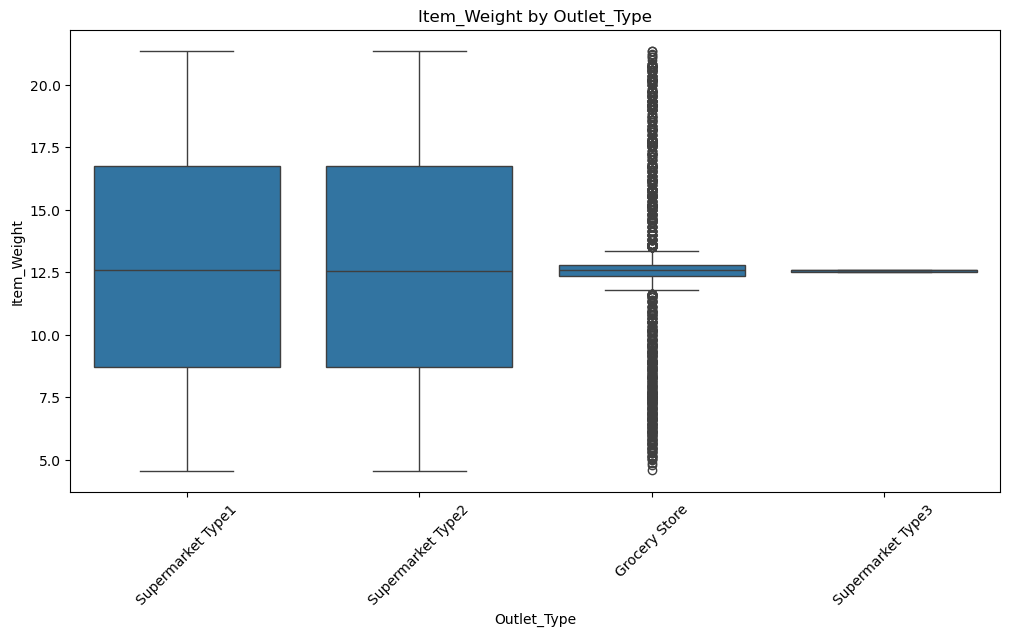

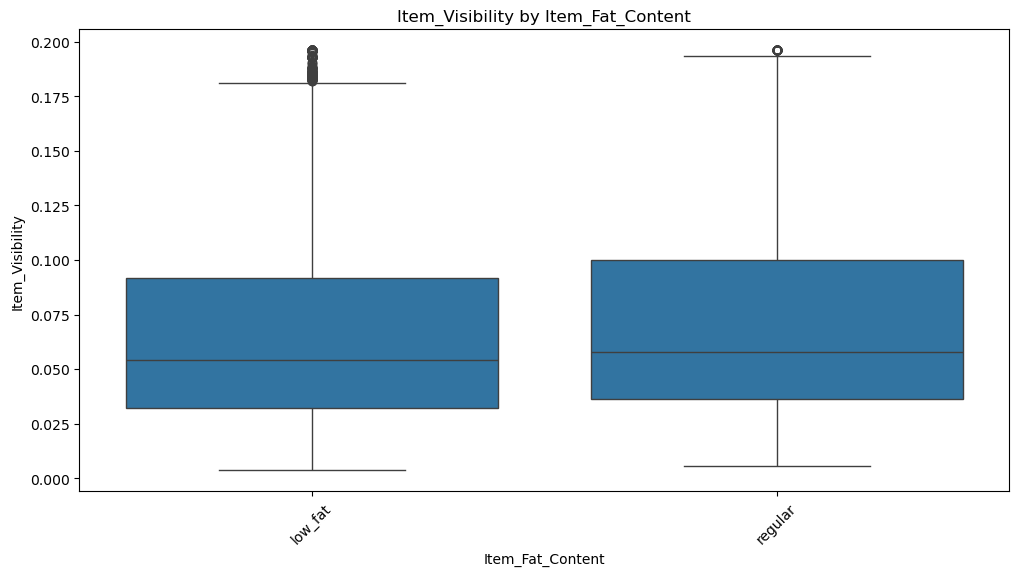

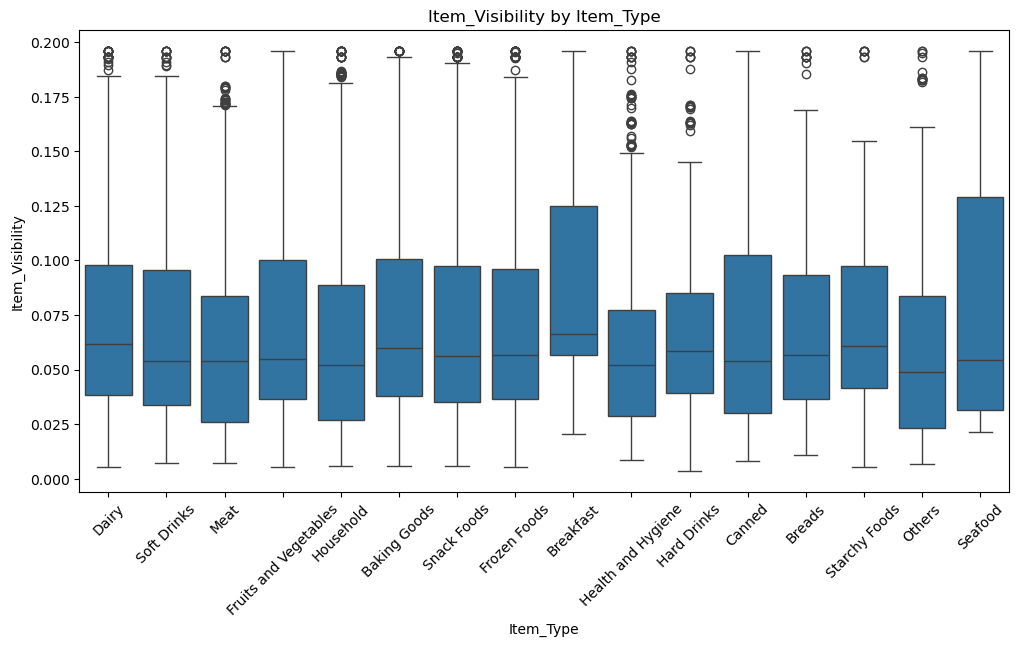

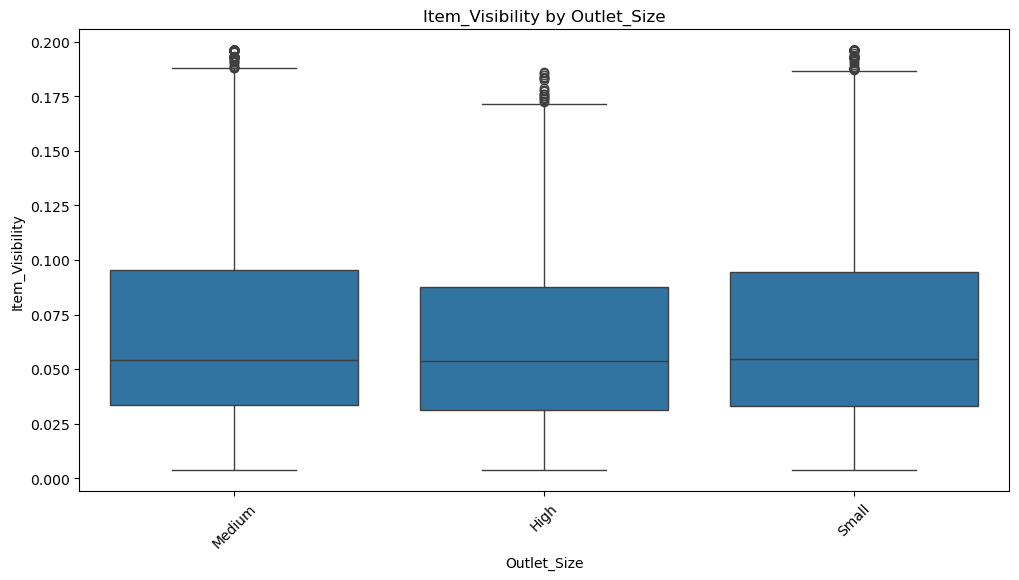

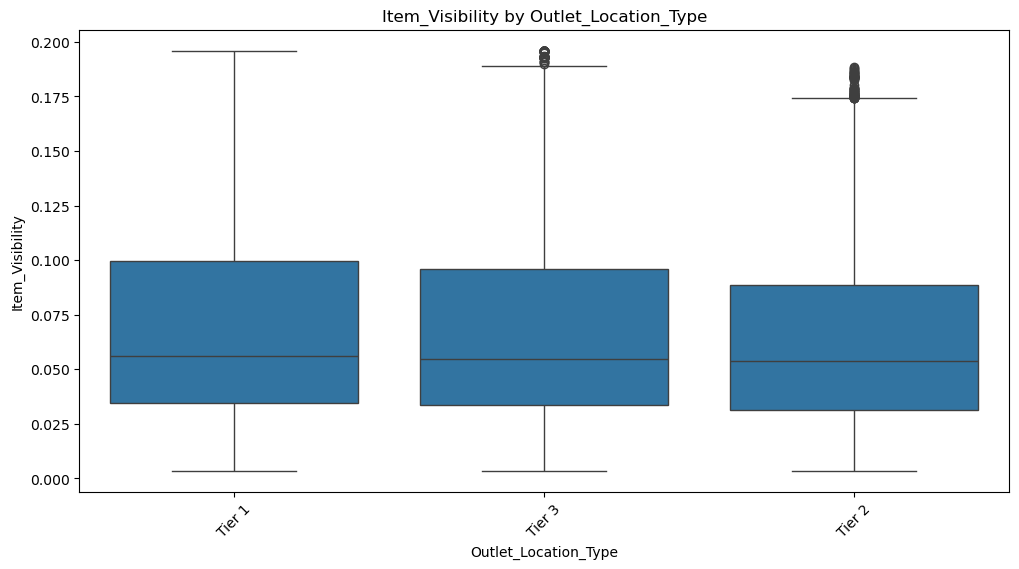

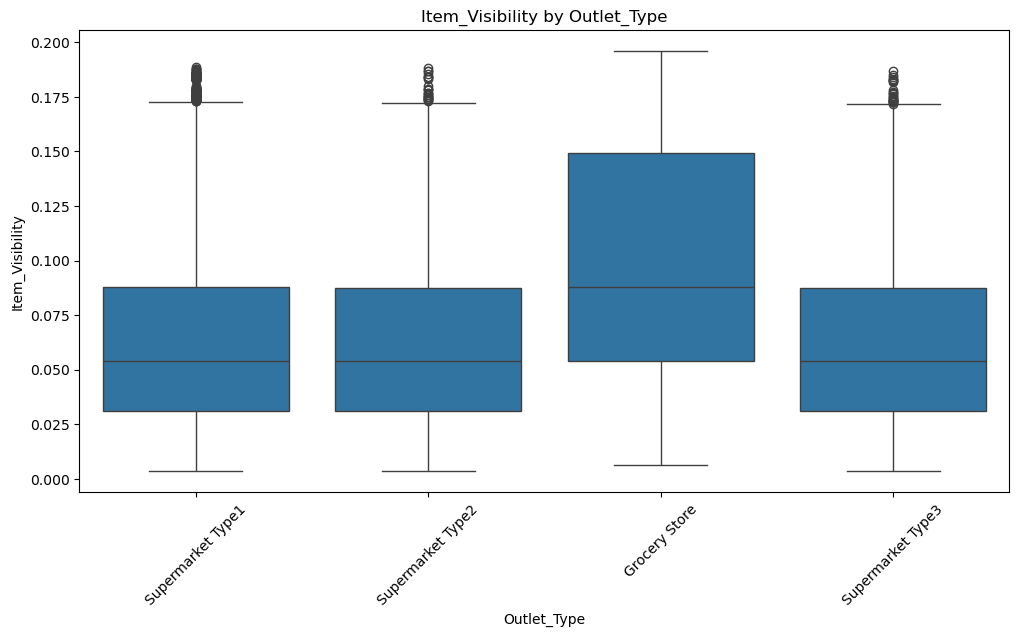

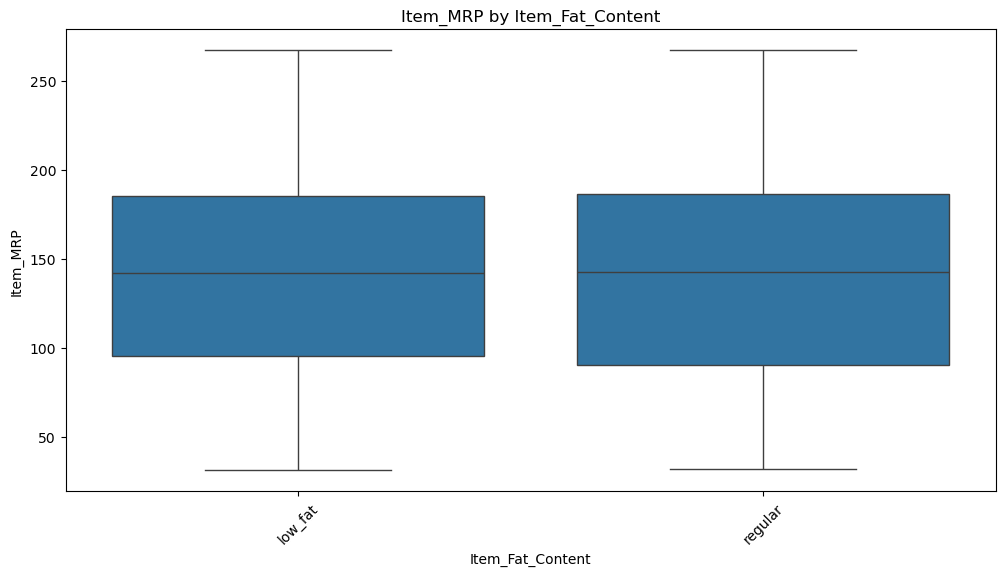

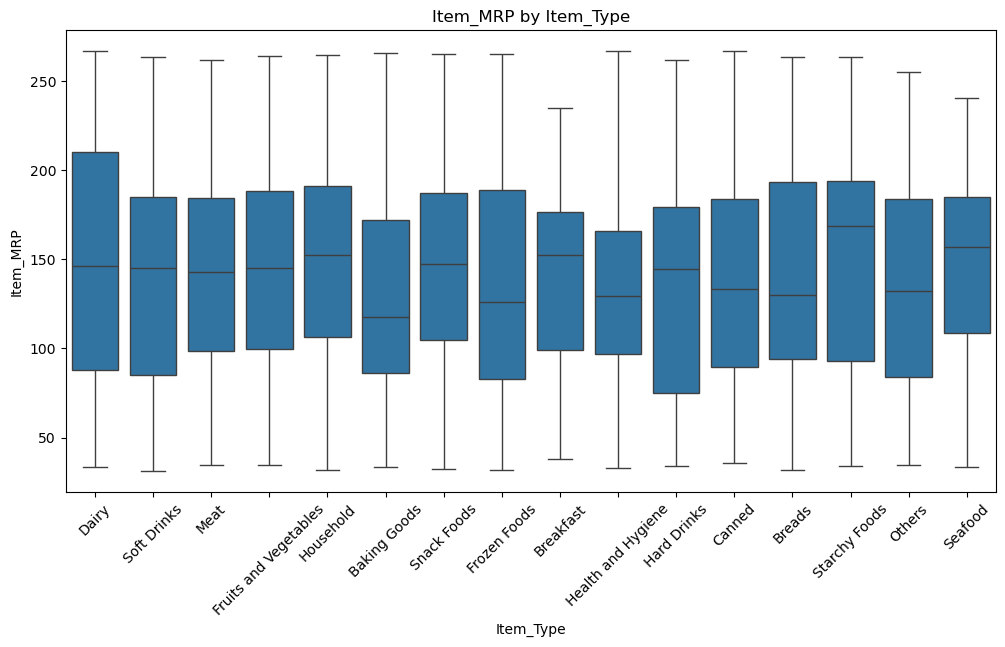

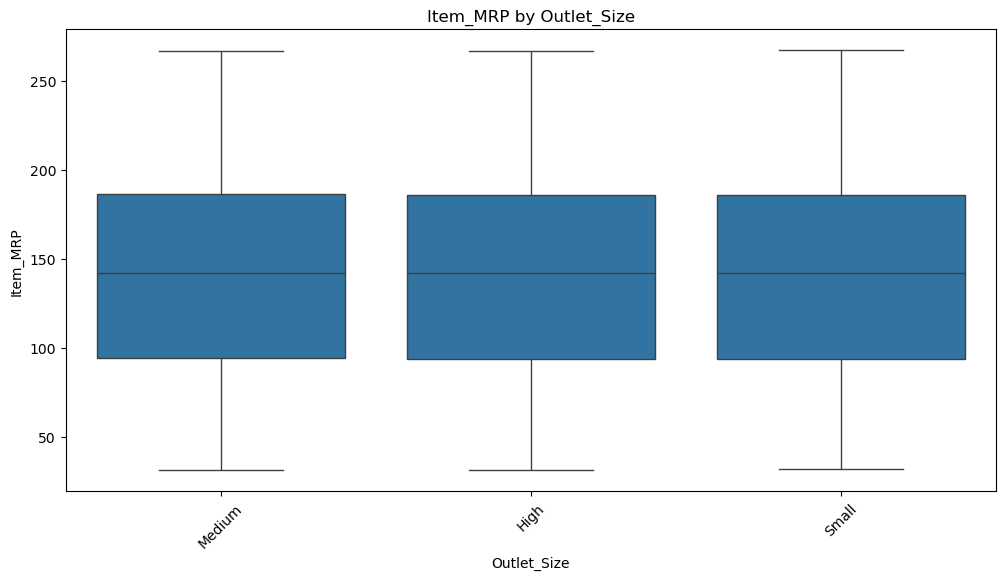

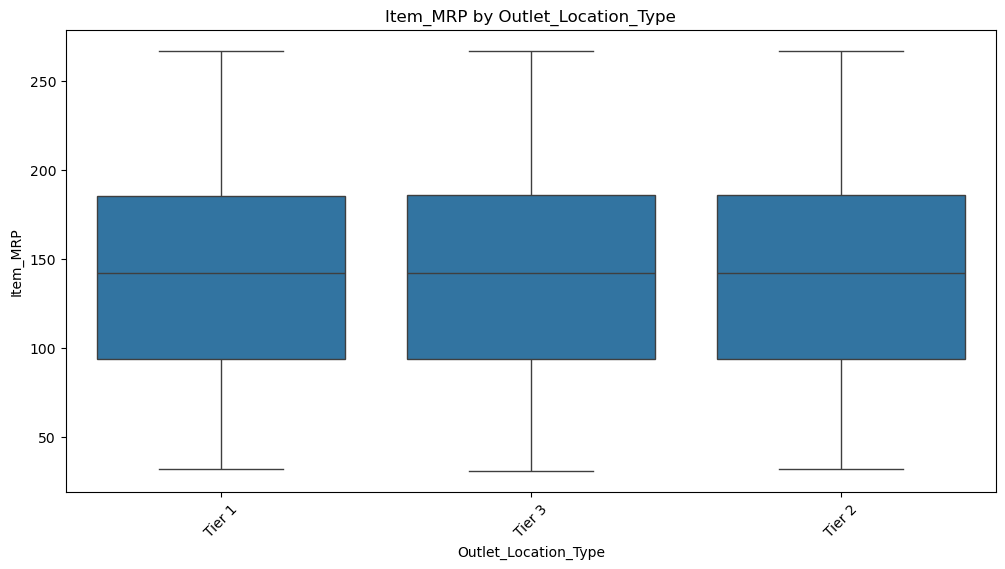

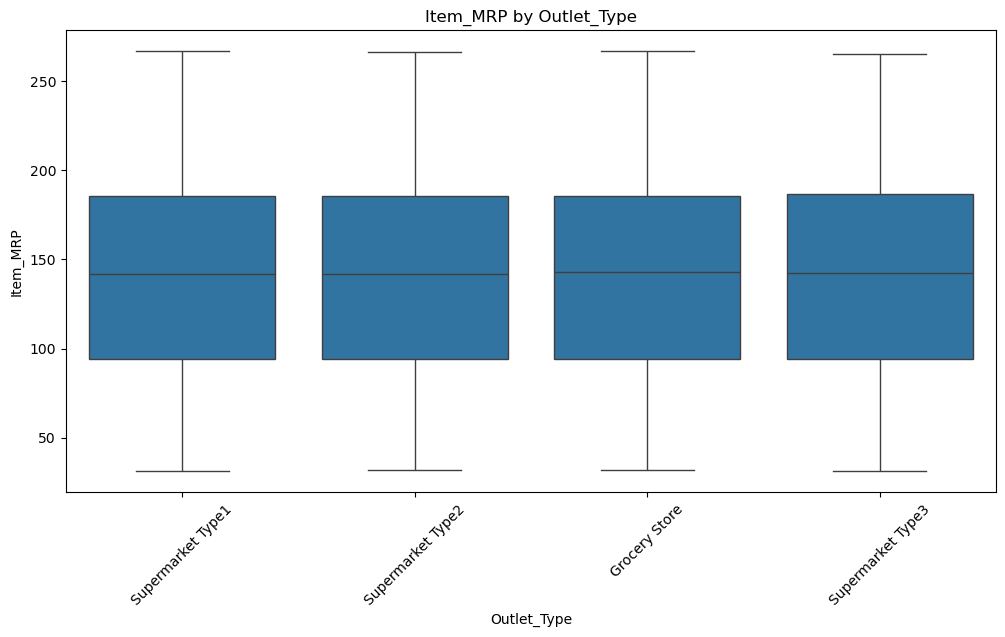

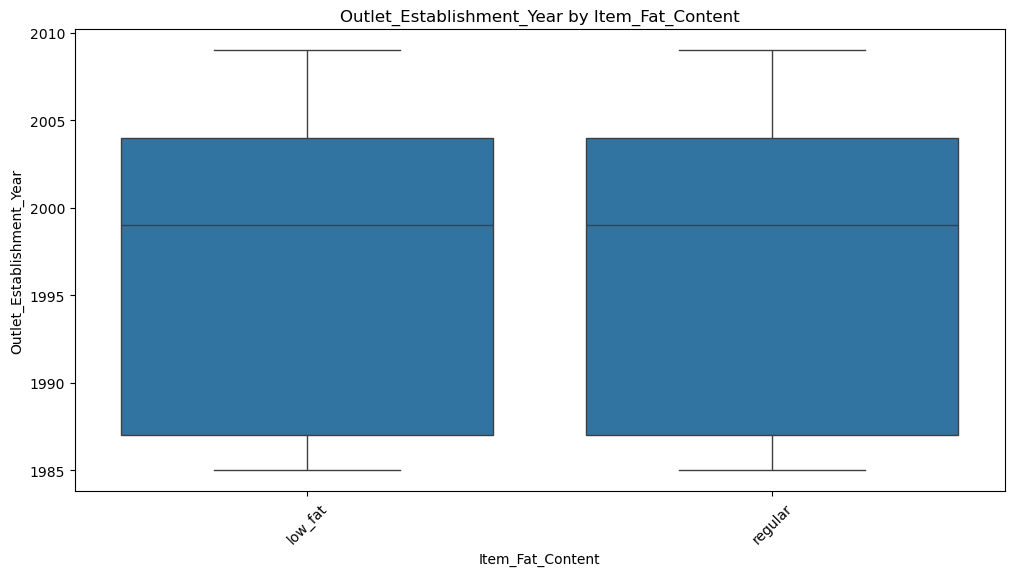

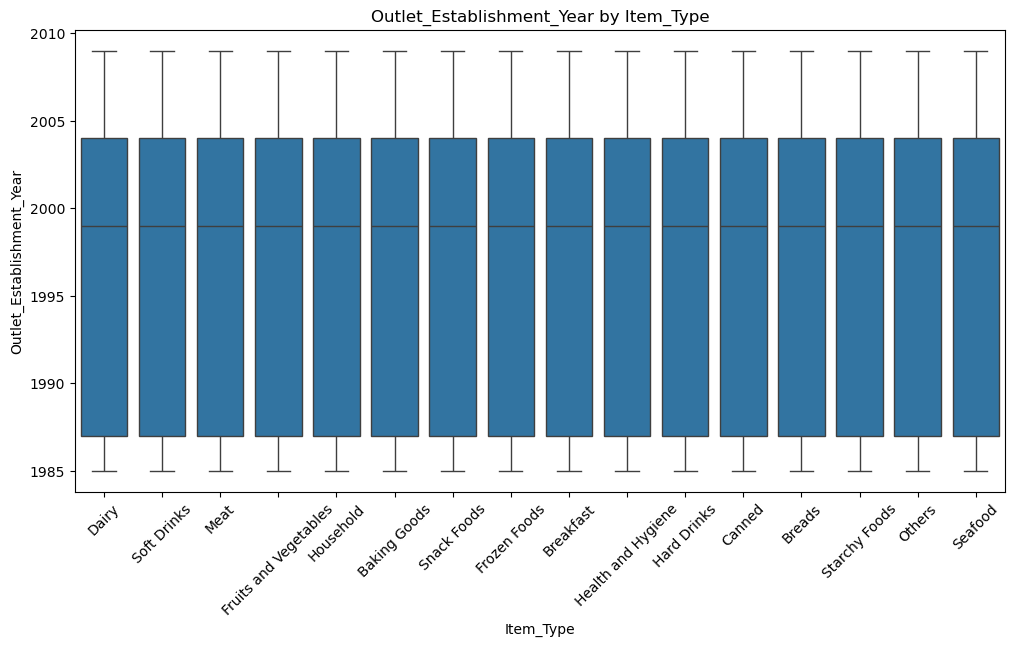

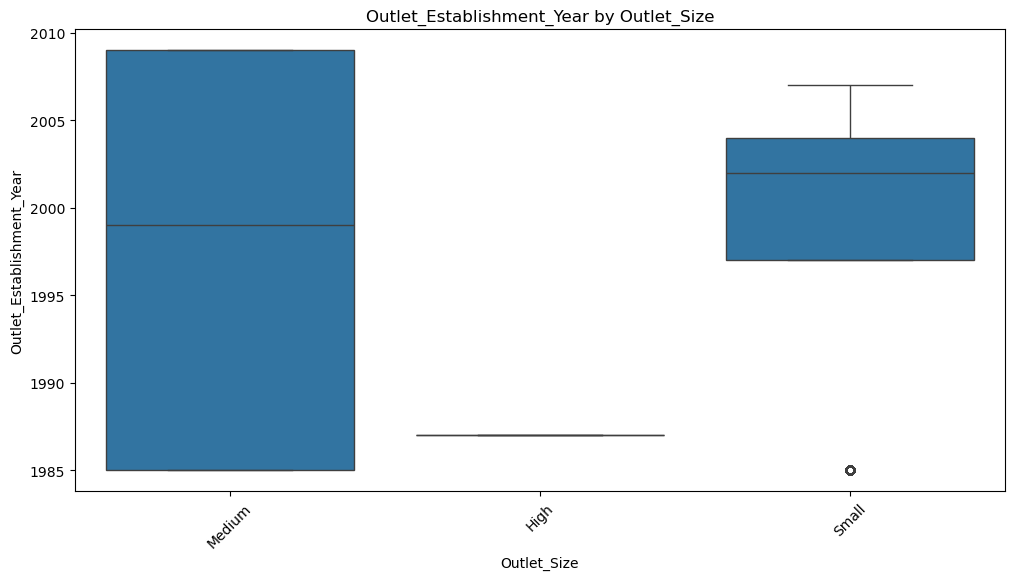

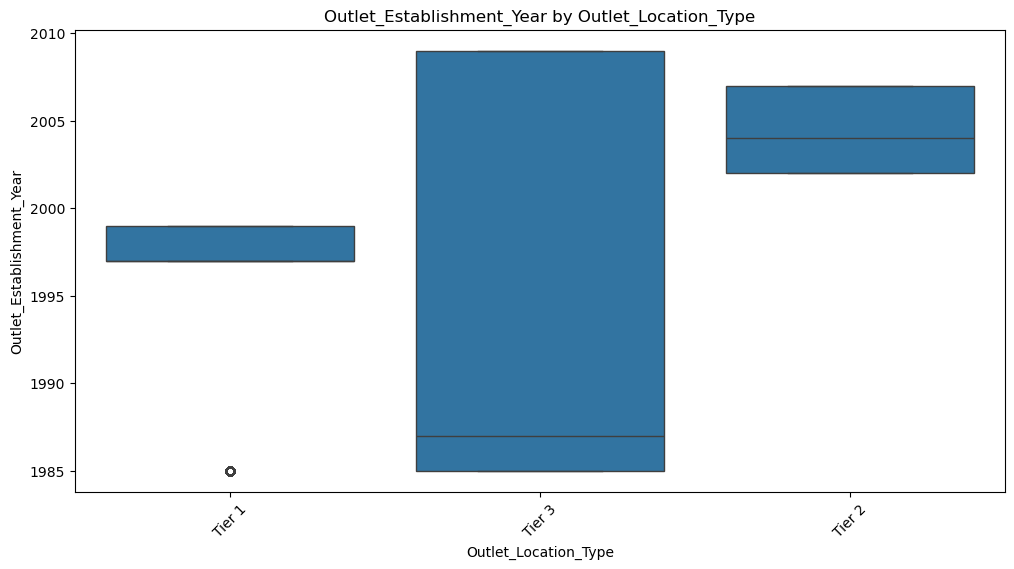

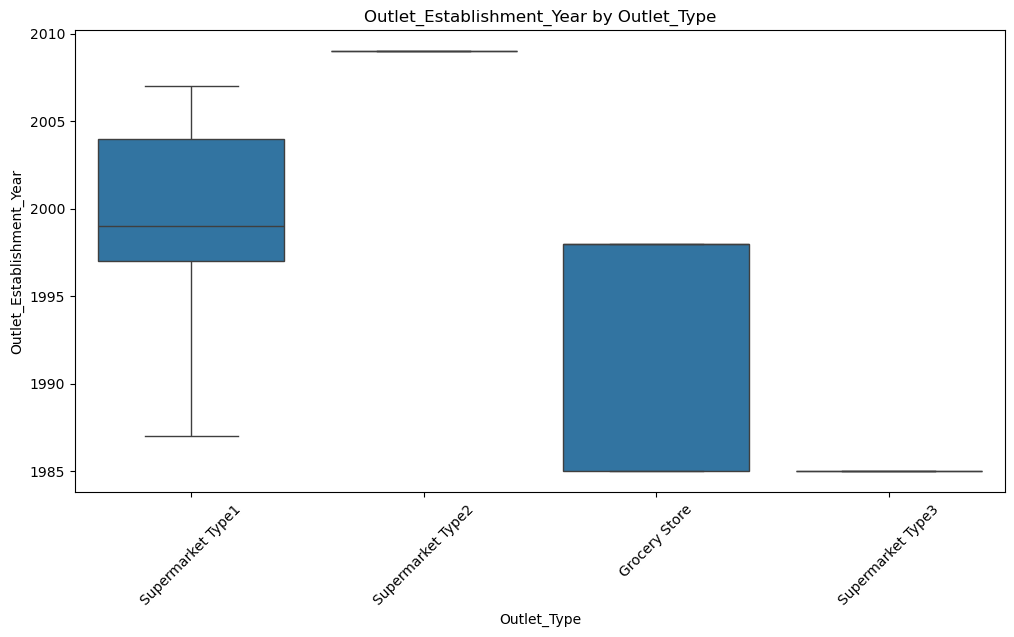

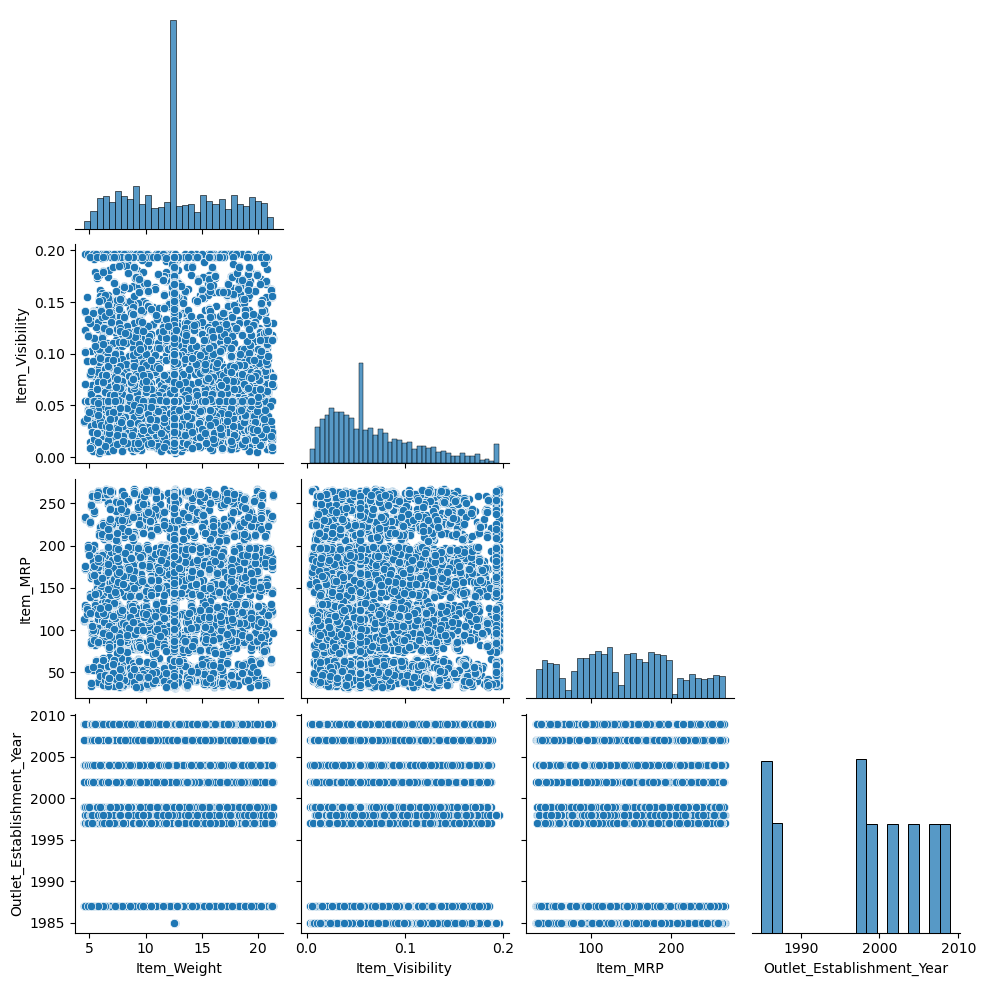

<Figure size 1200x600 with 0 Axes>

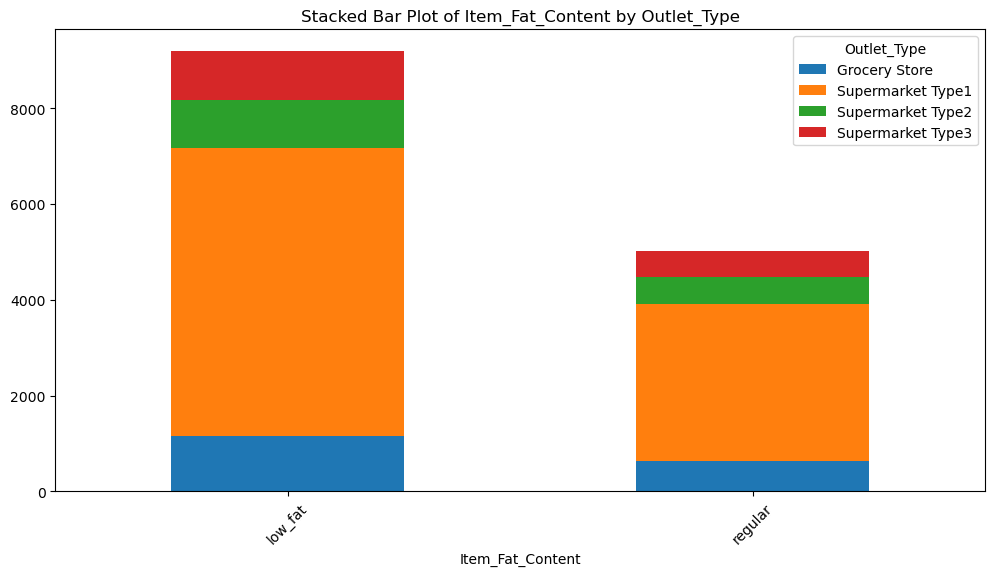

<Figure size 1200x600 with 0 Axes>

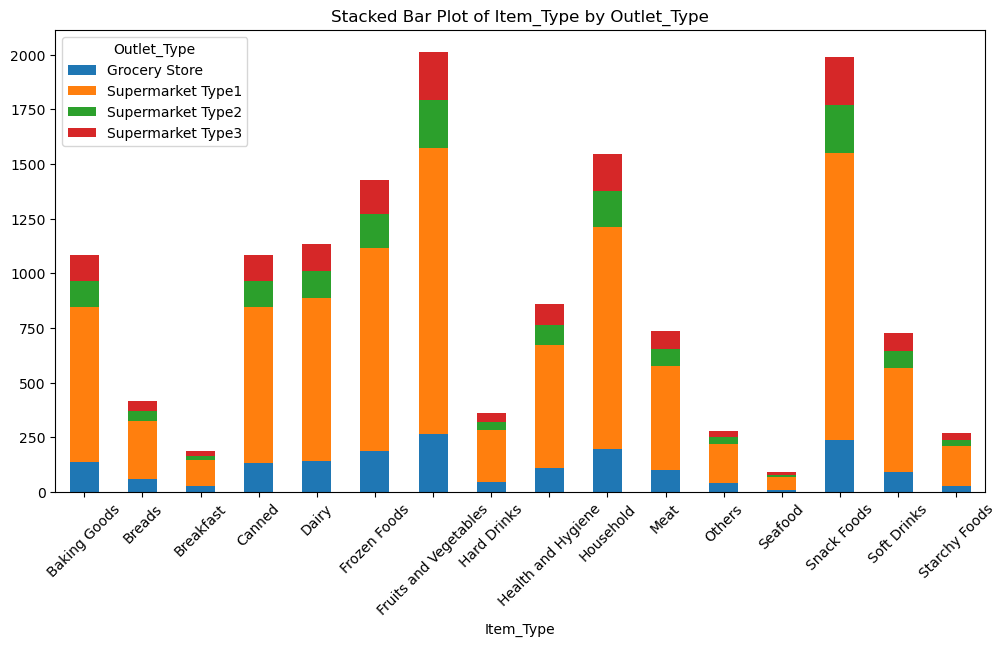

<Figure size 1200x600 with 0 Axes>

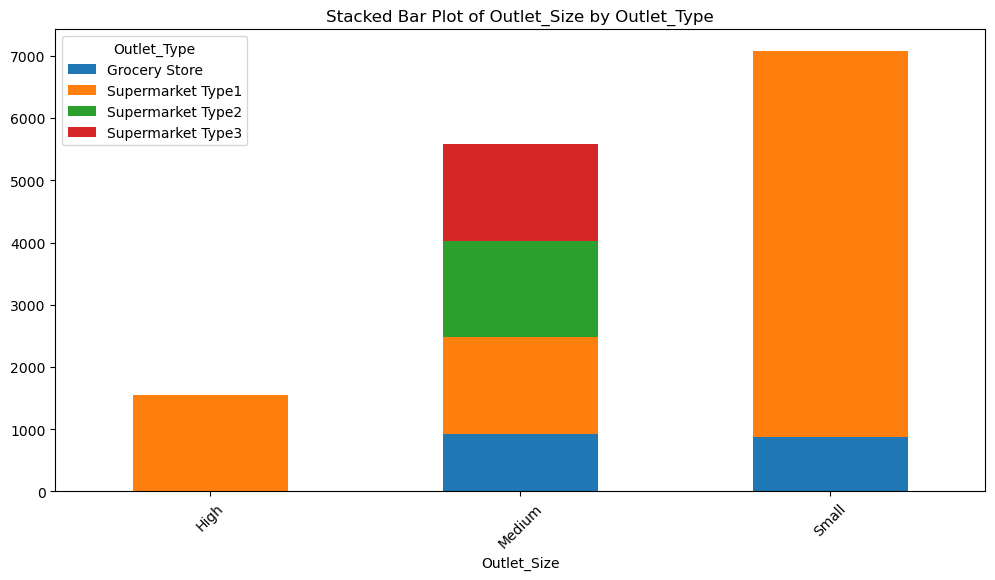

<Figure size 1200x600 with 0 Axes>

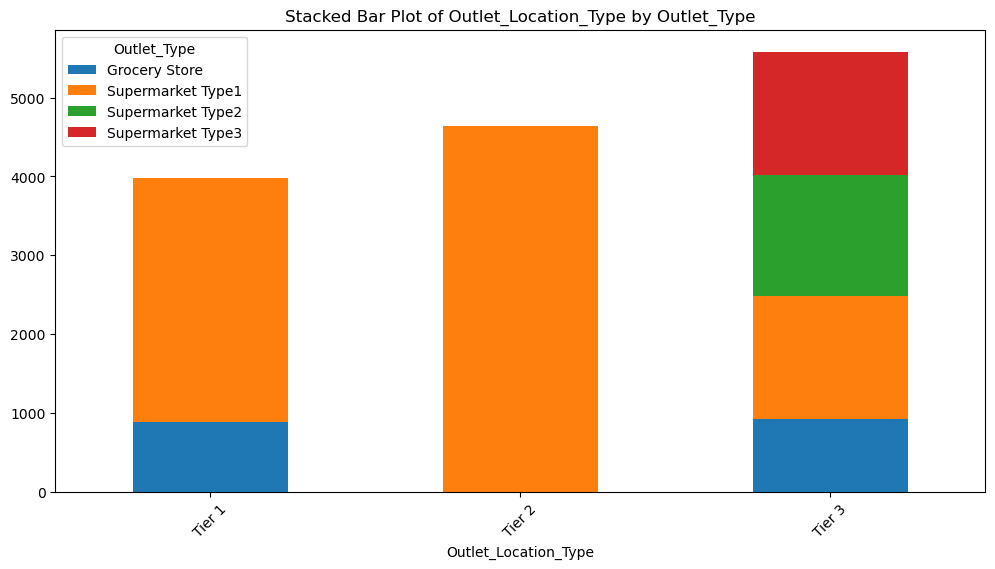

<Figure size 1200x600 with 0 Axes>

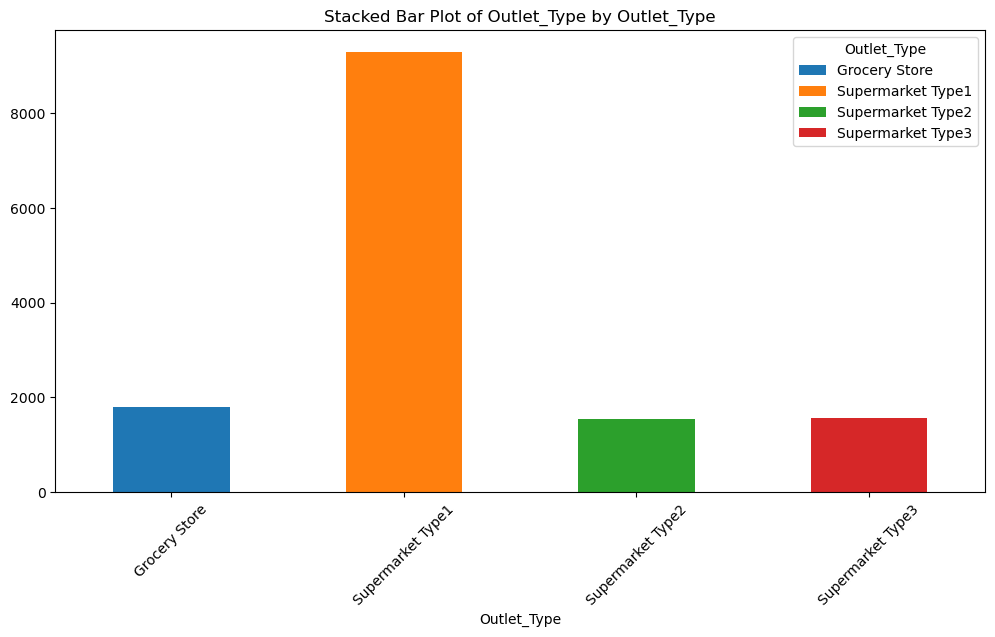

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

#Univariate Analysis of data
#Distribution 
numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()

#Count plots
categorical_features = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=data, x=feature, order=data[feature].value_counts().index)
    plt.title(f'Count Plot of {feature}')
    plt.xticks(rotation=45)
    plt.show()

#Bivariate Analysis
#Correlation Heatmap 
plt.figure(figsize=(10, 8))
correlation_matrix = data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#Boxplot of numerical features against categorical features
for feature in numerical_features:
    for cat_feature in categorical_features:
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=data, x=cat_feature, y=feature)
        plt.title(f'{feature} by {cat_feature}')
        plt.xticks(rotation=45)
        plt.show()

#Multivariate Analysis
#Pairplot
numerical_features_subset = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
sns.pairplot(data[numerical_features_subset], corner=True)
plt.show()

#Bar plots
for cat_feature in categorical_features:
    plt.figure(figsize=(12, 6))
    data.groupby([cat_feature, 'Outlet_Type']).size().unstack().plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title(f'Stacked Bar Plot of {cat_feature} by Outlet_Type')
    plt.xticks(rotation=45)
    plt.show()


### Train Data exploration

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train_data = pd.read_csv('train_data_cleaned.csv')
target_variable = 'Item_Outlet_Sales'
target_label='Item Sales

#Distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_data[target_variable], kde=True, bins=30)
plt.title(f'Distribution of {target_variable}')
plt.xlabel(target_label)
plt.ylabel('Frequency')
plt.show()

#Correlation heatmap
numerical_features_with_target = numerical_features + [target_variable]
plt.figure(figsize=(10, 8))
correlation_matrix = train_data[numerical_features_with_target].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap Including Target Variable')
plt.show()

#Boxplots of the target variable against categorical features
for cat_feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=train_data, x=cat_feature, y=target_variable)
    plt.title(f'{target_variable} by {cat_feature}')
    plt.xticks(rotation=45)
    plt.ylabel(target_label)
    plt.xlabel(cat_feature)
    plt.show()

#Pairplot for numerical features and the target variable
sns.pairplot(train_data[numerical_features_with_target])
plt.show()

#Bar plots 
for cat_feature in categorical_features:
    plt.figure(figsize=(12, 6))
    avg_sales = train_data.groupby(cat_feature)[target_variable].mean().sort_values()
    avg_sales.plot(kind='bar', figsize=(12, 6))
    plt.title(f'Average {target_label} by {cat_feature}')
    plt.ylabel(f'Average {target_label}')
    plt.xlabel(cat_feature)
    plt.xticks(rotation=45)
    plt.show()

SyntaxError: unterminated string literal (detected at line 3) (4036464028.py, line 3)